In [6]:
import numpy as np
import h5py

In [2]:
fpath = '/home/dashora7/nitish_dataset_terms.npy'
data = np.load(fpath, allow_pickle=True)
data_dict = data.item()
data_dict.keys()
term_idxs = np.nonzero(data_dict['terminals'])[0]
obses = data_dict['observations']

996121 996299
(178, 3)
[0.01129171 0.0617409  0.7433879 ]


(0.0, 10.0)

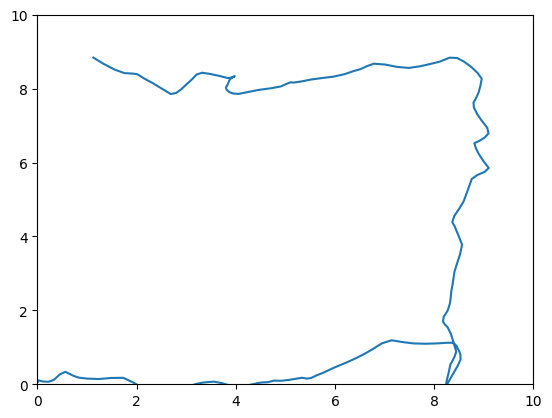

In [4]:
start = term_idxs[-20]
end = term_idxs[-19]
exp_slice = obses[start + 181:end]
print(start+181, end)
exp_slice_poses = exp_slice[:, :3]
print(exp_slice_poses.shape)
print(exp_slice_poses[0])
exp_slice_poses[0]
import matplotlib.pyplot as plt
plt.plot(exp_slice_poses[:, 0], exp_slice_poses[:, 1])
plt.xlim(0, 10)
plt.ylim(0, 10)
# np.save('exp_slice_poses.npy', exp_slice_poses)

In [112]:
fpath = '/home/dashora7/medium_antmaze.hdf5'
data = h5py.File(fpath, 'r')
data.keys()
term_idxs = np.nonzero(data['terminals'])[0]
obses = data['observations']
rews = data['rewards']
print(obses.shape, term_idxs.shape)
rew_idxs = np.nonzero(rews)[0]
print(rew_idxs[-500:-300])


(1000000, 29) (1959,)
[438426 438427 438428 438429 438430 438431 438432 438433 438434 438435
 438436 439797 439798 439799 458762 460542 460543 460544 460545 487741
 487742 487743 487744 487745 501814 501815 501816 501817 526832 526833
 526834 526835 526836 526837 530776 530777 530778 536874 536875 536899
 536914 536915 536916 536917 536918 536954 536955 544019 544020 544025
 544026 544027 545691 551141 551142 551143 551144 551145 551379 551380
 551381 551414 551415 551429 551430 551431 551432 551433 551447 551448
 551481 551513 551514 551527 551528 551529 559608 559609 559610 559611
 584179 584180 594908 594909 600811 600812 600813 601777 601778 601779
 605592 605593 605594 605595 605596 624823 624824 624825 624826 631581
 631582 631583 631584 635103 635104 635105 635106 635107 637772 637773
 637774 637775 637776 639033 639034 639035 657165 657166 657167 657168
 657169 657170 686952 695269 695270 695271 695272 695281 695282 695283
 695315 695316 695317 695318 703148 711765 711766 72622

In [99]:
print(data['observations'][:20, :2])

[[20.854668  12.700178 ]
 [20.857098  12.703055 ]
 [20.855333  12.688506 ]
 [20.835522  12.702064 ]
 [20.802952  12.799492 ]
 [20.784998  12.940175 ]
 [20.769073  13.058594 ]
 [20.774662  13.16458  ]
 [20.830437  13.284883 ]
 [20.997423  13.440942 ]
 [21.13445   13.581343 ]
 [21.252012  13.725506 ]
 [21.24656   13.873802 ]
 [21.193882  14.0226   ]
 [21.136608  14.176228 ]
 [21.088638  14.339079 ]
 [21.023932  14.530122 ]
 [21.008284  14.788835 ]
 [20.977043  15.019879 ]
 [20.952337  15.1394415]]


526532 526832
start pos, end pos [4.349214   0.82859385] [20.47609  20.676172]
[4.349214   0.82859385] [20.47609  20.676172]


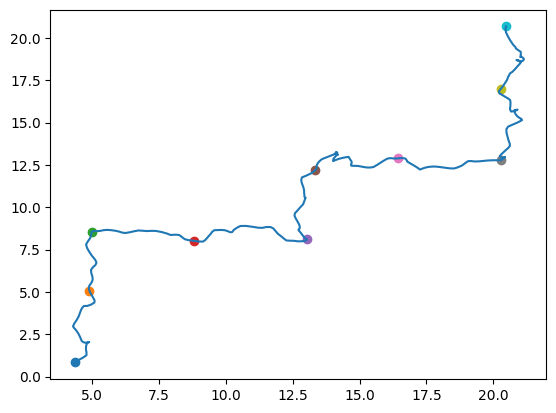

In [148]:
start, end = 526532, 526832 # best
subgoal_idxs = [0, 30, 50, 80, 115, 145, 190, 220, 260, 299]
exp_slice = obses[start:end]
print(start, end)
print('start pos, end pos', exp_slice[0, :2], exp_slice[-1, :2])
exp_slice_poses = exp_slice[:, :2]
print(exp_slice_poses[0], exp_slice_poses[-1])
plt.plot(exp_slice_poses[:, 0], exp_slice_poses[:, 1])
for i in subgoal_idxs:
    plt.scatter(exp_slice_poses[i, 0], exp_slice_poses[i, 1])


In [ ]:
exp_slice[subgoal_idxs]

In [157]:
fpath = '/home/dashora7/hard_antmaze.hdf5'
data = h5py.File(fpath, 'r')
data.keys()
term_idxs = np.nonzero(data['terminals'])[0]
obses = data['observations']
rews = data['rewards']
print(obses.shape, term_idxs.shape)
rew_idxs = np.nonzero(rews)[0]
print(rew_idxs[-1000:-700])

(1000000, 29) (6189,)
[788509 788510 788511 788515 788516 788517 788518 788519 788520 788525
 788527 788528 788529 788530 788531 788532 788541 788542 788543 788557
 788558 788559 788560 788583 788584 788585 788586 788587 788588 788589
 788609 788610 788611 788612 788613 788614 788615 788616 788635 788636
 788637 788638 788639 788640 788641 788642 788645 788646 788647 788648
 788667 788668 788669 788682 788697 788698 788699 788721 788722 788723
 788724 788725 788726 788727 788728 788729 788730 788731 788732 788742
 788743 788744 788759 788760 788761 788780 788781 788782 788783 788784
 788785 788786 794115 794116 794117 794118 802936 802937 802938 802939
 802940 805114 805115 805116 805117 805118 805119 810384 810385 810386
 810387 810388 810389 810390 810614 810615 810616 810617 823032 823033
 823034 823035 826925 826926 826927 826928 826929 826941 826942 826943
 826944 826945 826946 826947 826948 826949 826950 826951 826952 826953
 827019 827020 827021 827022 827023 827029 827030 82703

804804 805114
start pos, end pos [8.543812   0.82561123] [31.456392 24.25408 ]
[8.543812   0.82561123] [31.456392 24.25408 ]


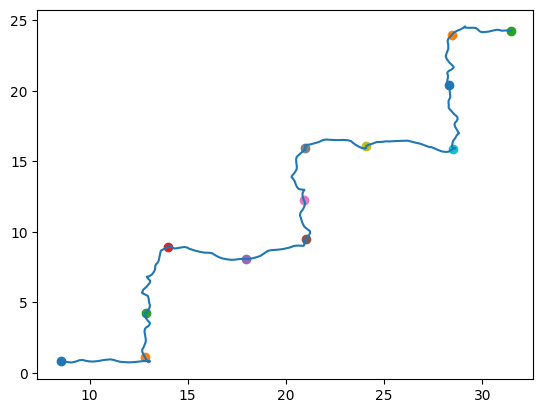

In [189]:
start, end = 805114 - 310, 805114 # best
# start, end = 892240 - 300, 892240

subgoal_idxs = [0, 30, 50, 90, 115, 135, 150, 175, 200, 225, 260, 285, 309]
exp_slice = obses[start:end]
print(start, end)
print('start pos, end pos', exp_slice[0, :2], exp_slice[-1, :2])
exp_slice_poses = exp_slice[:, :2]
print(exp_slice_poses[0], exp_slice_poses[-1])
plt.plot(exp_slice_poses[:, 0], exp_slice_poses[:, 1])
for i in subgoal_idxs:
    plt.scatter(exp_slice_poses[i, 0], exp_slice_poses[i, 1])

In [ ]:
exp_slice[subgoal_idxs]